In [1]:
# Lendo o arquivo
import re
import sys
def leArquivoSequencia(nomeArquivo):
    arq = open(nomeArquivo, "r")
    coluna = arq.read()
    #coluna_nova = coluna.split(' ')
    return (coluna)

In [2]:
arquivo = leArquivoSequencia("C:/Users/linha/amostra.txt")

In [3]:
print(arquivo)

81.532908277765	         5650.60009765625
84.449596217131	         6738.60009765625
87.3653295245052	7647.2001953125
90.2801086416823	8456.400390625
93.1939340101477	8820.599609375
96.1068060711499	8708
99.0187252656487	8839.599609375
101.929692034327	8996.7998046875
104.839706817616	9085.7998046875
107.748770055658	8813.599609375
110.65688218832	        8726.7998046875
113.564043655221	8462.2001953125
116.470254895696	8306.599609375
119.375516348797	8740.599609375
122.279828453325	8967.7998046875
125.183191647807	9077.7998046875
128.085606370497	9187.7998046875
130.987073059369	9232.599609375
133.88759215215 	9318.2001953125
136.787164086278	9351.7998046875
139.685789298935	9369.2001953125
142.583468227024	9434.599609375
145.480201307192	9537.400390625
148.375988975799	9534.400390625
151.270831668949	9455
154.164729822491	9439
157.057683871972	9200.599609375
159.949694252708	9262.7998046875
162.840761399709	9560.2001953125
165.730885747768	9486.7998046875
168.620067731362	9548
171.508

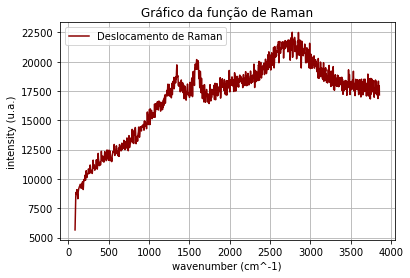

In [10]:
 #Lendo o arquivo sem baseline e plotando
import matplotlib.pyplot as plt

x, y = [], []

for linha in open('amostra.txt', 'r'):
        dados = [float(s) for s in linha.split()]
        x.append(dados[0])
        y.append(dados[1])

plt.plot(x, y, color='#8B0000', label='Deslocamento de Raman')
plt.grid()
plt.title('Gráfico da função de Raman')
plt.xlabel('wavenumber (cm^-1)')
plt.ylabel('intensity (u.a.)')
plt.legend()
plt.show()

In [25]:
print(len(x))



1650


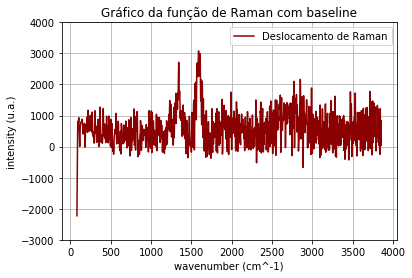

In [11]:
#Gráfico com baselin
#https://pypi.org/project/BaselineRemoval/
from BaselineRemoval import BaselineRemoval
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(x)
baseObj1=BaselineRemoval(y)


Modpoly_output=baseObj.ModPoly(polynomial_degree)
Modpoly_output1=baseObj1.ModPoly(polynomial_degree)

Imodpoly_output=baseObj.IModPoly(polynomial_degree)
Imodpoly_output1=baseObj1.IModPoly(polynomial_degree)

Zhangfit_output=baseObj.ZhangFit()
Zhangfit_output1=baseObj1.ZhangFit()


import matplotlib.pyplot as plt
plt.plot(x, (Zhangfit_output1), color='#8B0000', label='Deslocamento de Raman')
plt.grid()
#plt.xlim(0, 400)
plt.ylim(-3000, 4000)
plt.title('Gráfico da função de Raman com baseline')
plt.xlabel('wavenumber (cm^-1)')
plt.ylabel('intensity (u.a.)')
plt.legend()
plt.show()

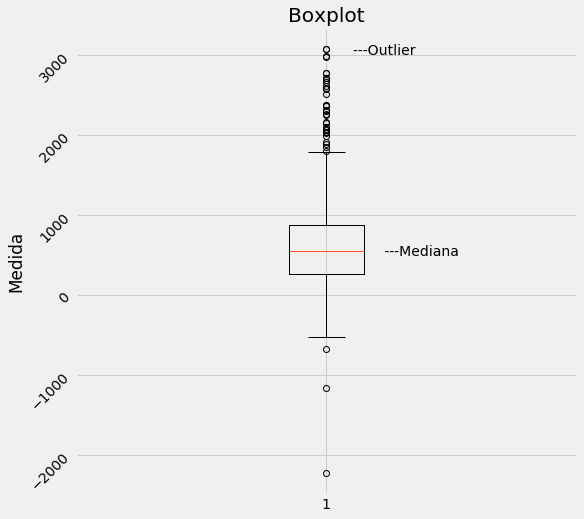

In [95]:
#Construção do Boxplot
with plt.style.context('fivethirtyeight'):  #Estilho de apresentação do gráfico
    plt.figure(figsize=(8,8))
    plt.title('Boxplot') # Titulo 
    plt.ylabel('Medida') # Eixo y 
    plt.boxplot([Zhangfit_output1])
    plt.grid('True')
    plt.yticks(rotation=45)# Rotação em 45 Graus 
    plt.text(1, 3010,'      ---Outlier')
    plt.text(1, 500,'             ---Mediana ')
    plt.show()

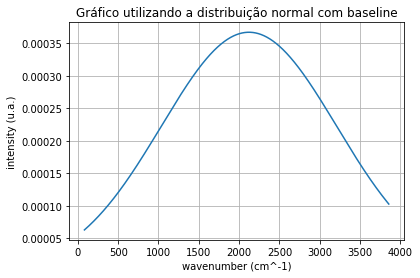

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics
from scipy import asarray as ar, exp, sqrt

x_axis = ar(x) 
mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.grid(True)
#plt.ylim(0,5000)
plt.title('Gráfico utilizando a distribuição normal com baseline')
plt.xlabel('wavenumber (cm^-1)')
plt.ylabel('intensity (u.a.)')
plt.show() 

In [97]:
print((10**7)*norm.pdf(1300, mean, sd))

2756.401436869626


In [98]:
print((10**7)*norm.pdf(1344, mean, sd) -(10**7)*norm.pdf(1591, mean, sd))

-416.74967750063934


In [18]:
#Cálculo de áreas em Python  (Não funciona para valores float, por exemplo em exp(x))
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

  
def f(x):
    return x**2
  
x = sy.Symbol("x")
print(sy.integrate(f(x), (x, 0, 2)))

print(sy.integrate(x/(x**2+2*x+1), x))


8/3
log(x + 1) + 1/(x + 1)


In [13]:
from scipy.stats import norm 
import statistics
a=0
b=100
n=1000
deltaX = (b-a)/n
x_axis = ar(x) 
mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
soma=0
for i in range(0,n,1):
    x=a+deltaX*i
    soma = soma+  (10**7)*norm.pdf(x, mean, sd)*deltaX
print(soma)

59652.766945925425
